In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading data
df = pd.read_csv("distance_data.csv")

In [3]:
df.head()

,experiment,duration,seeder,Cap2,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
0,1,1,436,100,2.783333,10.600000,23.483333,25.850000,0
1,1,1,436,116,4.500000,20.983333,23.216667,13.916667,0
2,1,1,436,255,6.200000,20.900000,27.200000,8.416667,0
3,1,1,436,449,17.016667,20.733333,15.933333,9.050000,0
4,1,1,436,3008,0.183333,1.033333,9.700000,51.816667,0


In [4]:
def combine_columns(df, col1, col2, new_col):
    combined_column = df[col1].astype(str) + "_" + df[col2].astype(str)
    df.insert(0, new_col, combined_column)
    df.drop([col1, col2], axis=1, inplace=True)
    return df

In [5]:
data = combine_columns(df, 'experiment', 'duration', 'Event')

In [6]:
data.head()

,Event,seeder,Cap2,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
0,1_1,436,100,2.783333,10.600000,23.483333,25.850000,0
1,1_1,436,116,4.500000,20.983333,23.216667,13.916667,0
2,1_1,436,255,6.200000,20.900000,27.200000,8.416667,0
3,1_1,436,449,17.016667,20.733333,15.933333,9.050000,0
4,1_1,436,3008,0.183333,1.033333,9.700000,51.816667,0


In [7]:
data.drop(['seeder', 'Cap2'], axis=1, inplace=True)

In [8]:
data.head()

,Event,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
0,1_1,2.783333,10.600000,23.483333,25.850000,0
1,1_1,4.500000,20.983333,23.216667,13.916667,0
2,1_1,6.200000,20.900000,27.200000,8.416667,0
3,1_1,17.016667,20.733333,15.933333,9.050000,0
4,1_1,0.183333,1.033333,9.700000,51.816667,0


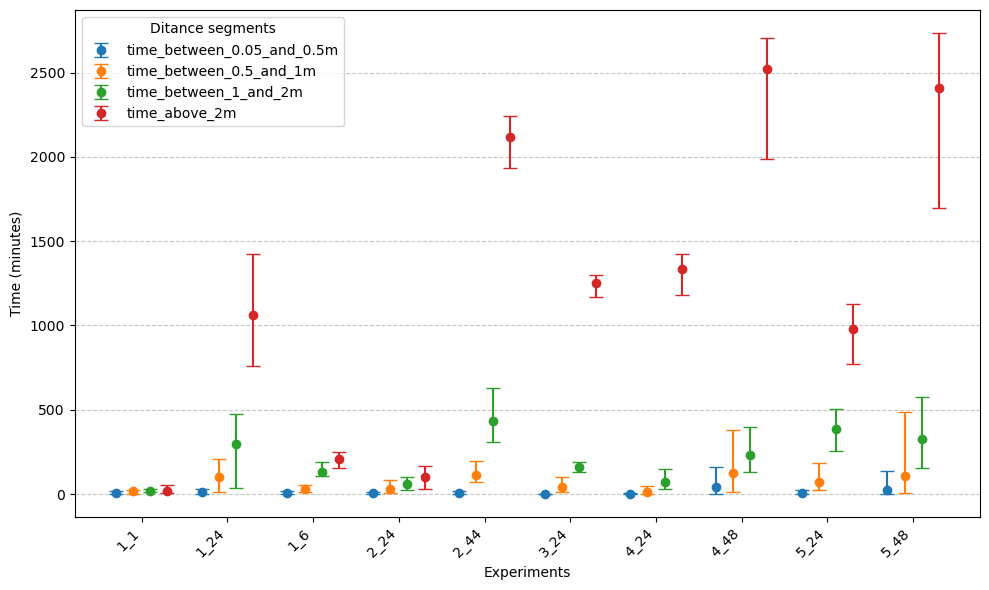

In [ ]:
# Prepare the data by grouping by 'Event'
grouped = data.groupby('Event').mean()

# Calculate error bars (min, mean, and max values for each event and type)
error_min = data.groupby('Event').min()
error_max = data.groupby('Event').max()
error_mean = data.groupby('Event').mean()

# X-axis positions
x = np.arange(len(grouped.index))

# Define colors for the types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
types = ['time_between_0.05_and_0.5m', 'time_between_0.5_and_1m', 'time_between_1_and_2m', 'time_above_2m']

# Create the error bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, col in enumerate(types):
    for j, event in enumerate(grouped.index):
        mean_value = error_mean.loc[event, col]
        min_value = error_min.loc[event, col]
        max_value = error_max.loc[event, col]

        # Plot error bars for each type
        ax.errorbar(
            x[j] + i * 0.2 - 0.3, mean_value,
            yerr=[[mean_value - min_value], [max_value - mean_value]],
            fmt='o', color=colors[i], ecolor=colors[i], capsize=5, label=col if j == 0 else ""
            )

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45, ha='right')
ax.set_ylabel("Time (minutes)")
ax.set_xlabel("Experiments")
ax.legend(title="Ditance segments")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("distance_distribution_inversed.tiff", dpi = 350, format='tiff', bbox_inches='tight')
plt.show()

# Plot error bars for each type with the same color as the points


# Inverse the axes
fig, ax = plt.subplots(figsize=(10, 6))

for i, col in enumerate(types):
    for j, event in enumerate(grouped.index):
        mean_value = error_mean.loc[event, col]
        min_value = error_min.loc[event, col]
        max_value = error_max.loc[event, col]

        # Plot horizontal error bars for each type
        ax.errorbar(
            mean_value, x[j] + i * 0.2 - 0.3,
            xerr=[[mean_value - min_value], [max_value - mean_value]],
            fmt='o', color=colors[i], ecolor=colors[i], capsize=5, label=col if j == 0 else ""
            )

# Customize the plot
ax.set_yticks(x)
ax.set_yticklabels(grouped.index, rotation=0, ha='right')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Experiments")
ax.legend(title="Distance segments")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("distance_distribution_inversed_horizontal.tiff", dpi=350, format='tiff', bbox_inches='tight')
plt.show()

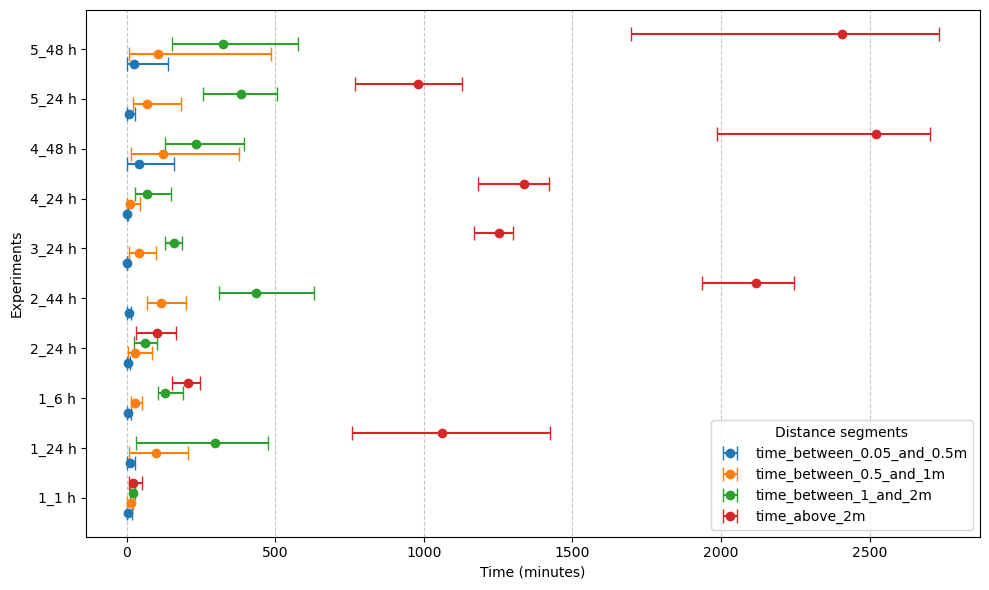

In [16]:
# Inverse the axes
fig, ax = plt.subplots(figsize=(10, 6))

for i, col in enumerate(types):
    for j, event in enumerate(grouped.index):
        mean_value = error_mean.loc[event, col]
        min_value = error_min.loc[event, col]
        max_value = error_max.loc[event, col]

        # Plot horizontal error bars for each type
        ax.errorbar(
            mean_value, x[j] + i * 0.2 - 0.3,
            xerr=[[mean_value - min_value], [max_value - mean_value]],
            fmt='o', color=colors[i], ecolor=colors[i], capsize=5, label=col if j == 0 else ""
            )

# Customize the plot
ax.set_yticks(x)
ax.set_yticklabels([label + " h" for label in grouped.index], rotation=0, ha='right')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Experiments")
ax.legend(title="Distance segments")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("distance_distribution_inversed_horizontal.tiff", dpi=500, format='tiff', bbox_inches='tight')
plt.show()

In [15]:
grouped

,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
Event,,,,,
1_1,5.800000,15.488889,20.819444,20.558333,0.000000
1_24,10.766667,99.816667,298.422222,1059.641667,0.000000
1_6,4.502778,29.775000,129.622222,206.325000,0.000000
2_24,3.836111,27.541667,62.038889,100.800000,0.166667
2_44,7.791667,115.436111,434.997222,2116.577778,0.666667
3_24,1.926667,40.966667,160.503333,1254.406667,0.600000
4_24,1.319444,10.472222,69.252778,1336.638889,0.000000
4_48,41.990000,122.563333,231.860000,2521.006667,0.800000
5_24,7.191667,68.872222,385.266667,981.800000,0.166667
